# Visualizing Samples and Labels of the SPEED Dataset

Starter kit for ESA's Kelvins pose estimation competition: https://gitlab.com/EuropeanSpaceAgency/speed-utils

This notebook helps to inspect the SPEED dataset. You can see samples from the dataset, with the corresponding ground truth labels visualized as projected axes.

In [1]:
from matplotlib import pyplot as plt
from random import randint
# !pwd
from utils import *

Let's set up the path to a local copy of the SPEED dataset, and instanciate the helper class.

In [2]:
dataset_root_dir = '../../speed'
dataset = SatellitePoseEstimationDataset(root_dir=dataset_root_dir)

First we show a number of random images from the dataset.

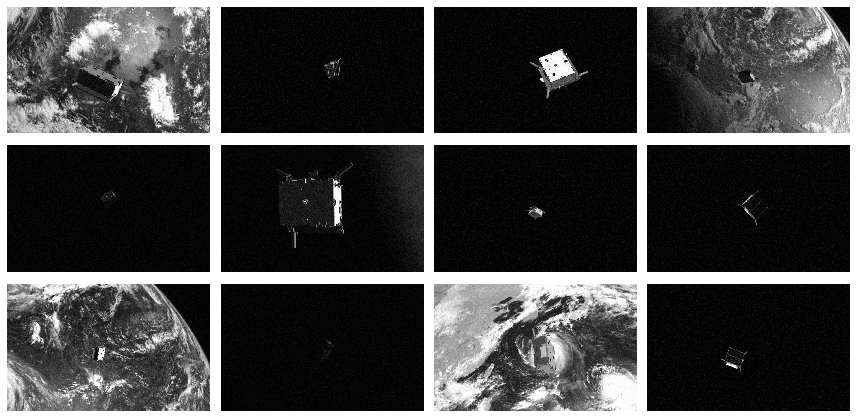

In [3]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i in range(rows):
    for j in range(cols):
        img = dataset.get_image(randint(0, 12000))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
fig.tight_layout()
        

---

We can visualize the pose labels with projecting axes on the samples. The correspondence between colors and directions in the satellite body frame is: red - x, green - y, blue - z.

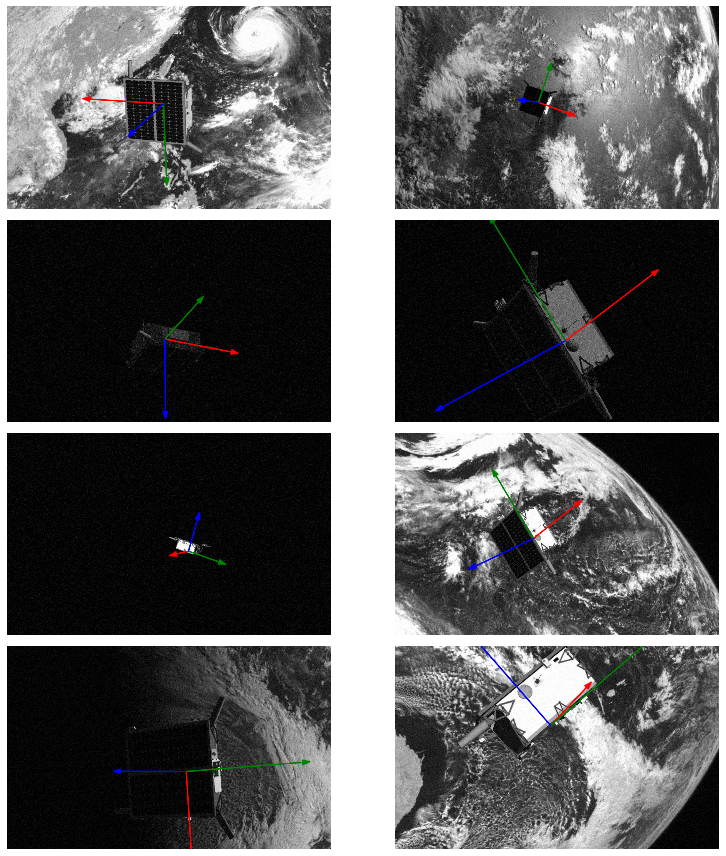

In [4]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, 12000), ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout()

## Wireframe and detection box visualization

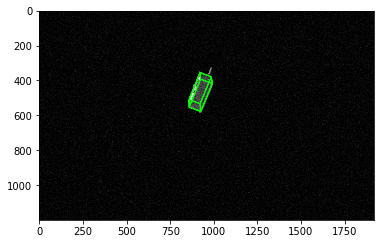

In [5]:
axes = plt.axes()
i = randint(0, 12000)
dataset.visualize(i, ax=axes,bb=True, pose=False)

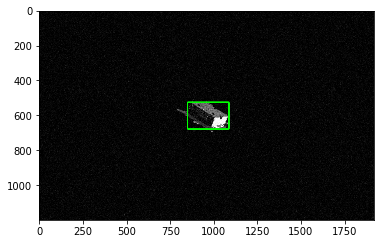

In [6]:
axes = plt.axes()
i = randint(0, 12000)
dataset.visualize(i, ax=axes,db=True, pose=False)

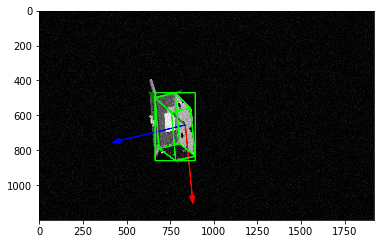

In [7]:
axes = plt.axes()
i = randint(0, 12000)
dataset.visualize(i, ax=axes,db=True, bb=True, pose=True)

## Updating annotations with bb and db

In [8]:
dataset.annotate(partition='real')

In [9]:
dataset.annotate(partition='train')

## Preprocess training images

In [10]:
dataset.preprocess()